# xyencoder

Детские расскраски в последнее время стали очень странными

Children’s colorings have recently become very strange.

In [1]:
! head 05e0fc40-df31-44e5-af72-f71af332b45f.train

label, x, y
0,21.393352621093662,0.19613837525733968
1,12.418784542138107,-8.499202861777523
0,22.523148298816004,-18.2557323931555
1,-29.425236357014178,5.537621812346123
0,3.3783013320759876,-31.03666365863236
1,15.502309124007343,24.45452244643049
0,-24.918310954383028,25.392247148289858
1,-21.687067131956933,-6.28197019207573
0,-28.24236539129624,21.36564768904556


In [2]:
! head 670d42f6-51bf-4419-92f9-22f351bce874.flag

x, y
-13.659538503290149,29.571552189042716
-32.82320512055823,-18.24799978822402
-6.060774176150034,5.629913940221252
-12.443484008440466,28.75240815274868
32.20849123073617,-21.93834297628378
9.708407232341706,-30.14093492940279
5.722779378659121,-24.15771994171923
31.358836843168937,15.536313133142155
-7.102594302734727,29.297425946935736


В файле `*.flag` отсутствует столбец label => это целевой столбец, где содержится флаг. Отобразим это на графике: 

In [3]:
X = []
y = []
X_test = []

In [4]:
with open("05e0fc40-df31-44e5-af72-f71af332b45f.train") as file:
    file.readline()
    for line in file:
        s = line[:-1].split(",")
        y.append(int(s[0]))
        X.append([float(s[1]), float(s[2])])

In [5]:
with open("670d42f6-51bf-4419-92f9-22f351bce874.flag") as file:
    file.readline()
    for line in file:
        s = line[:-1].split(",")
        X_test.append([float(s[0]), float(s[1])])

In [6]:
import matplotlib.pyplot as plt

In [16]:
plt.rcParams['figure.figsize'] = [20, 10]

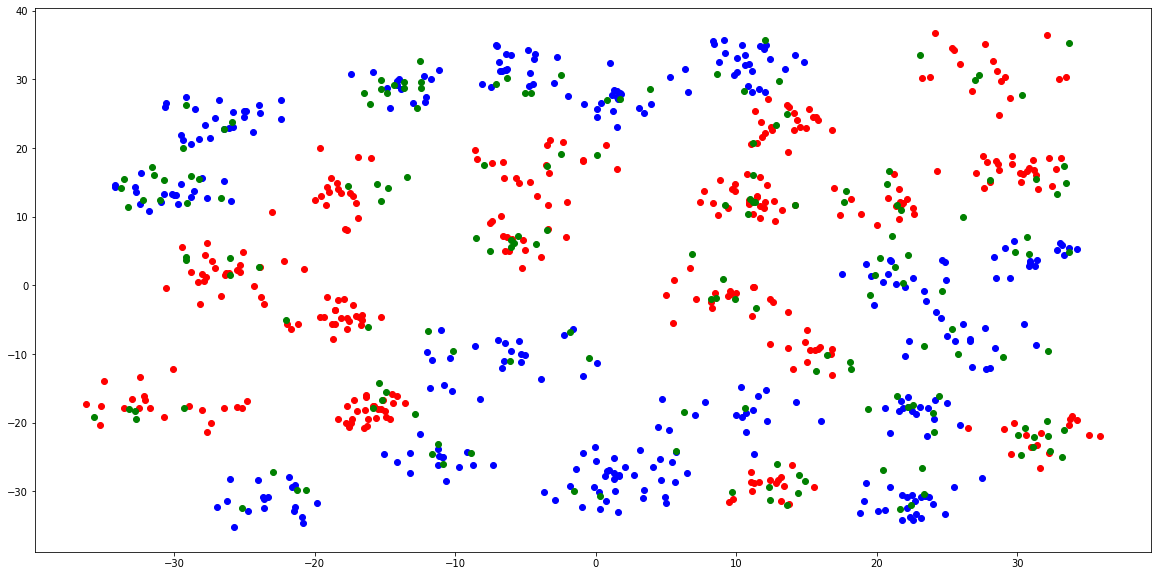

In [36]:
plt.scatter([X[i][0] for i in range(len(X)) if y[i] == 0], [X[i][1] for i in range(len(X)) if y[i] == 0], c='b')
plt.scatter([X[i][0] for i in range(len(X)) if y[i] == 1], [X[i][1] for i in range(len(X)) if y[i] == 1], c='r')
plt.scatter([x[0] for x in X_test], [x[1] for x in X_test], c='g')

Синие кластеры - там, где классетры дали 0, красные  - где дали 1; зеленые - те, которые предстоит определить. Видим, что зеленые точки четко попадают либо в синий, либо в зеленый кластер. => применяем метод k-ближайших соседей.

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
import warnings
warnings.filterwarnings('ignore')

In [40]:
neigh = KNeighborsClassifier(n_neighbors=3)

In [41]:
neigh.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [42]:
neigh.predict([[-13.659538503290149,29.571552189042716]])

array([0])

In [43]:
flag = ''

In [44]:
with open("670d42f6-51bf-4419-92f9-22f351bce874.flag") as file:
    file.readline()
    for line in file:
        s = line[:-1].split(",")
        flag += str(neigh.predict([s])[0])

In [45]:
flag #mctf{h4i1_dat45ci3nce}

'01101101011000110111010001100110011110110110100000110100011010010011000101011111011001000110000101110100001101000011010101100011011010010011001101101110011000110110010101111101'